In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive


/content/drive


In [4]:
cd MyDrive/


/content/drive/MyDrive


In [5]:
cd Comment\ Toxicity\ Datasets

/content/drive/MyDrive/Comment Toxicity Datasets


In [93]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np


In [7]:
ls

sample_submission.csv  test.csv  test_labels.csv  train.csv


In [36]:
data=  pd.read_csv("train.csv")

In [37]:
data.head

<bound method NDFrame.head of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe

In [38]:
data[data.columns[2]]

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: toxic, Length: 159571, dtype: int64

In [39]:
data[data['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


Preprocessing

In [40]:
from tensorflow.keras.layers import TextVectorization

In [41]:
 data[data.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [42]:
x= data['comment_text']
y= data[data.columns[2:]].values

In [43]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [44]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [45]:
Max_Words= 200000 #numbers of words in vocab

In [46]:
vectorizor= TextVectorization(max_tokens=Max_Words,
                              output_sequence_length=1800,
                              output_mode='int')

In [47]:
vectorizor.adapt(x.values)

In [48]:
vectorizor.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [49]:
vectorizor("HEllo world, life is great")

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288, 263, 306, ...,   0,   0,   0])>

In [50]:
vectorized_text=vectorizor(x.values)

In [25]:
len(x)

159571

In [28]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [29]:
#MCSHBAP: Data Pipeline: map,cache, shuffle, batch, prefetch using tf.data.Dataset.from_tensor_slices
dataset= tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset= dataset.cache()
dataset=dataset.shuffle(190000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [32]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [33]:
batch_x

array([[   48,     7,  1490, ...,     0,     0,     0],
       [  312,     8,    69, ...,     0,     0,     0],
       [49826,    40,  1431, ...,     0,     0,     0],
       ...,
       [  447,  1193, 15020, ...,     0,     0,     0],
       [   76,   102, 10800, ...,     0,     0,     0],
       [    8,    19,   272, ...,     0,     0,     0]])

In [34]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [36]:
int(len(dataset)*.7)

6981

In [39]:
train= dataset.take(int(len(dataset)*0.7))
val=dataset.skip(int(len(dataset)*0.2)).take(int(len(dataset)*0.2))
test=dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [40]:
len(train)

6981

In [41]:
len(val)

1994

In [42]:
len(test)

997

In [44]:
train_gen=train.as_numpy_iterator()

In [45]:
train_gen.next()

(array([[   191,    288,      5, ...,      0,      0,      0],
        [175254,    594,    467, ...,      0,      0,      0],
        [  5891,    301, 171758, ...,      0,      0,      0],
        ...,
        [   621,      3,  12687, ...,      0,      0,      0],
        [   176,    164,      3, ...,      0,      0,      0],
        [ 25432,   2075,   2066, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

Model Building

In [58]:
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [61]:
model=Sequential(
    [
    layers.Embedding(Max_Words+1, 32),
    layers.Bidirectional(LSTM(32, activation='tanh')),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(6,activation='sigmoid'),
    ]
)

In [62]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                        

In [64]:
history = model.fit(train, epochs=10,validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 753s 106ms/step - loss: 0.0612 - val_loss: 0.0465
Epoch 2/10
6981/6981 [==============================] - 633s 91ms/step - loss: 0.0449 - val_loss: 0.0414
Epoch 3/10
6981/6981 [==============================] - 622s 89ms/step - loss: 0.0400 - val_loss: 0.0354
Epoch 4/10
6981/6981 [==============================] - 621s 89ms/step - loss: 0.0351 - val_loss: 0.0319
Epoch 5/10
6981/6981 [==============================] - 620s 89ms/step - loss: 0.0319 - val_loss: 0.0284
Epoch 6/10
6981/6981 [==============================] - 620s 89ms/step - loss: 0.0282 - val_loss: 0.0248
Epoch 7/10
6981/6981 [==============================] - 617s 88ms/step - loss: 0.0260 - val_loss: 0.0214
Epoch 8/10
6981/6981 [==============================] - 615s 88ms/step - loss: 0.0229 - val_loss: 0.0196
Epoch 9/10
6981/6981 [==============================] - 612s 88ms/step - loss: 0.0205 - val_loss: 0.0182
Epoch 10/10
6981/6981 [==============================]

In [65]:
history.history

{'loss': [0.061240054666996,
  0.04491592198610306,
  0.03996678441762924,
  0.03514401987195015,
  0.03190215677022934,
  0.02822856791317463,
  0.02596634067595005,
  0.022936243563890457,
  0.020525963976979256,
  0.01818913035094738],
 'val_loss': [0.04650798439979553,
  0.04136969894170761,
  0.03535004332661629,
  0.031896863132715225,
  0.02836296521127224,
  0.02476458251476288,
  0.02137701027095318,
  0.01960461586713791,
  0.018218038603663445,
  0.014881332404911518]}

In [66]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

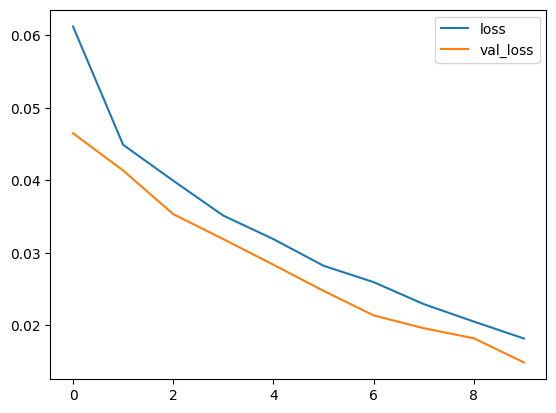

In [67]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

Prediction

In [109]:
input_text= vectorizor("i will murder you")

In [110]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [111]:
(model.predict(np.expand_dims(input_text,0))>0.5).astype(int)

1/1 [==============================] - 0s 51ms/step


array([[0, 0, 0, 0, 0, 0]])

Evaluation

In [115]:
batch_X,batch_Y=test.as_numpy_iterator().next()

In [117]:
result=model.predict(batch_X)

1/1 [==============================] - 0s 63ms/step


In [121]:
(result>=0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [124]:
batch_Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [125]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [126]:
pre= Precision()
re=Recall()
acc=CategoricalAccuracy()

In [127]:
for batch in test.as_numpy_iterator():
  X,Y = batch
  yhat=model.predict(X)
  yhat=yhat.flatten()
  y_true=Y.flatten()

  pre.update_state(y_true,yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 80ms/step


In [132]:
print(f"Precision: {pre.result().numpy()}\nRecall: {re.result().numpy()}\nAccuracy:{acc.result().numpy()}")

Precision: 0.9271803498268127
Recall: 0.9145323038101196
Accuracy:0.5075225830078125


In [136]:
model.save("toxicity.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
cd drive

/content/drive


In [22]:
cd MyDrive

/content/drive/MyDrive


In [24]:
cd Comment Toxicity Datasets

/content/drive/MyDrive/Comment Toxicity Datasets


In [25]:
import tensorflow as tf

In [26]:
model=tf.keras.models.load_model('toxicity.h5')

In [51]:
input=vectorizor("I hate you")

In [54]:
input

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  8, 363,   7, ...,   0,   0,   0])>

In [58]:
data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [57]:
model.predict(np.expand_dims(input,0))>0.5

1/1 [==============================] - 0s 140ms/step


array([[ True, False, False, False, False, False]])

END!!

Gradio implementation

In [91]:
!pip install typing-extensions --upgrade

In [82]:
!pip install gradio jinja2

  Using cached gradio-4.7.1-py3-none-any.whl (16.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 2.6 MB/s eta 0:00:00


In [92]:
import gradio as gr

ImportError: ignored